# Introduction
<hr style="border:2px solid black"> </hr>


**What?**  Boston houses



# Import modules
<hr style="border:2px solid black"> </hr>

In [22]:
import numpy
import pandas as pd
from numpy import arange
from pylab import rcParams
from sklearn.svm import SVR
from sklearn import datasets
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
rcParams['figure.figsize'] = 13, 13
rcParams['font.size'] = 15

# Loading  dataset
<hr style="border:2px solid black"> </hr>


- Let’s look at the well-known **Boston housing** dataset.
- Ypu have 506 data point and this is not a large dataset.



In [3]:
fnames = [i for i in dir(datasets) if 'load_' in i]
#print("Available data set: ", fnames)

fname = 'load_boston'
loader = getattr(datasets, "load_boston")()
dataset = pd.DataFrame(loader['data'], columns=loader['feature_names'])
dataset['target'] = loader['target']
print("Checking data")
print("Dataset shape: ", dataset.shape)

Checking data
Dataset shape:  (506, 14)


In [4]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
print("Dataset types:")
dataset.dtypes

Dataset types:


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

# Summary distribution of each attribute
<hr style="border:2px solid black"> </hr>

In [7]:
set_option('precision', 1)  
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


# Correlations matrix
<hr style="border:2px solid black"> </hr>

In [8]:
set_option('precision', 2) 
dataset.corr(method = 'pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47



- We can also see some bright yellow and dark purple that suggest candidates for removal to better improve accuracy of models later on. We can remove them because
they are highly correlateed hence, we do not need to model them both.



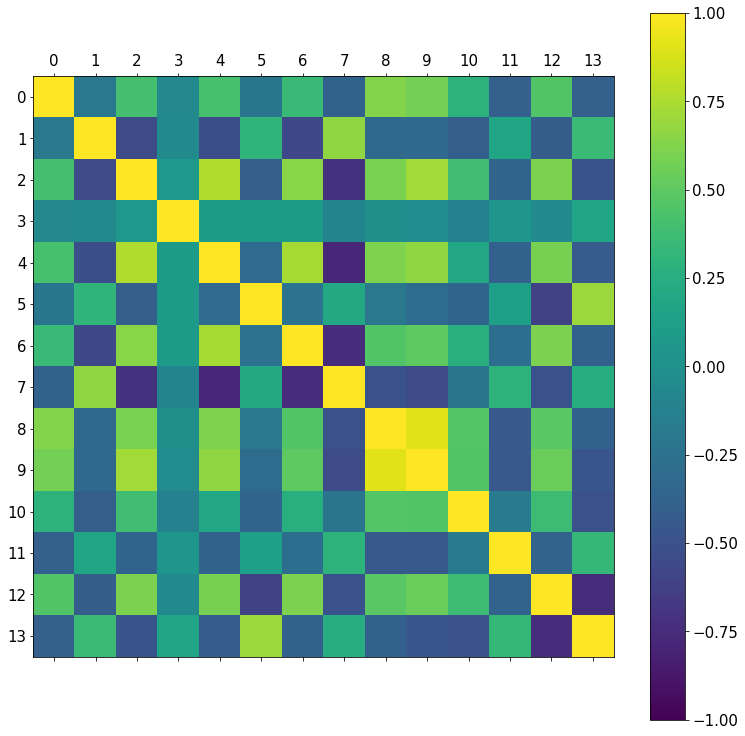

In [14]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(method = 'pearson'), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
pyplot.show()

# Histogram & density plots
<hr style="border:2px solid black"> </hr>


- We can see that some attributes may have an exponential distribution, such as CRIM, ZN, AGE and B. 
- We can see that others may have a bimodal distribution such as RAD and TAX.
- We can also use a slightly different way of showing the result. 
- By showing the density it may be more clear that not all the input feature have a perfect  Gaussian distribution.



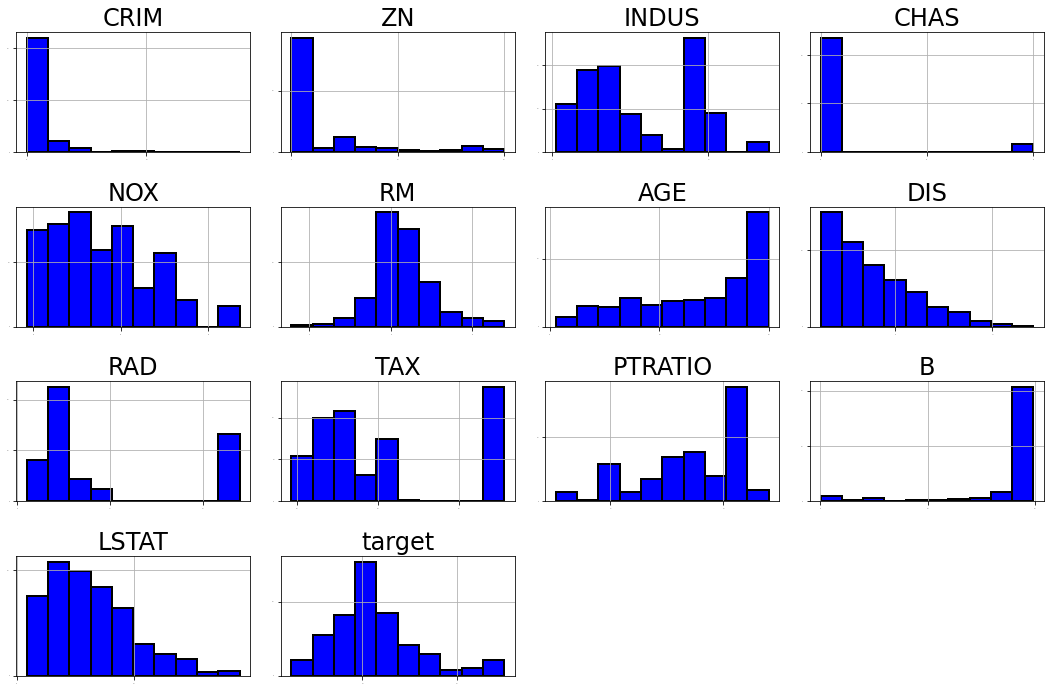

In [18]:
# Plotting
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
dataset.hist(sharex=False, sharey=False, xlabelsize=1,
             ylabelsize=1, color='blue', edgecolor='black', lw=2)
pyplot.tight_layout()
pyplot.grid(True)
pyplot.show()

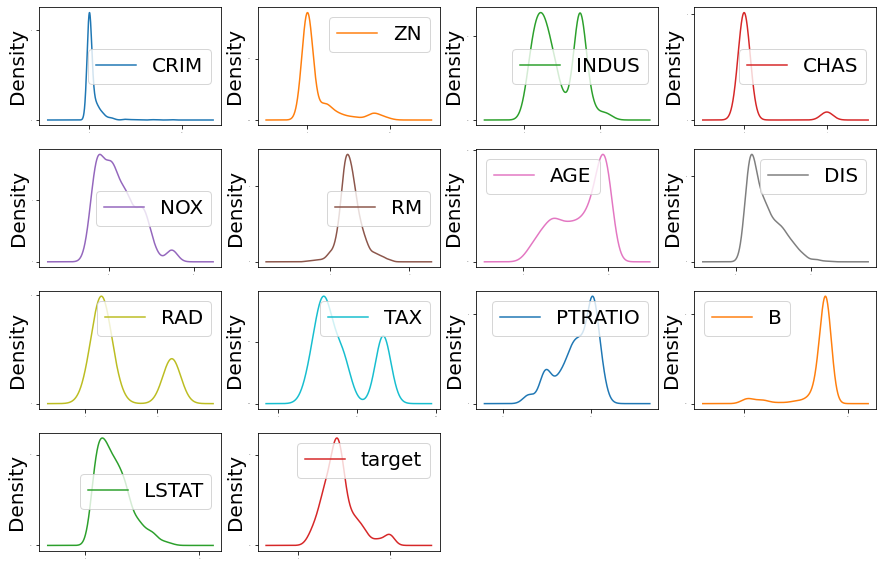

In [19]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1)
pyplot.show()

# Box and whisker plots
<hr style="border:2px solid black"> </hr>


- Boxplots provide a way to represent distributions and their extreme ranges, signaling whether some observations are too far from the core of the data — a problematic situation for some learning algorithms.
- 
This helps point out the skew in many distributions so much so that data looks like outliers (e.g. beyond the whisker of the plots). 
- To be more precise here is how the whisher plot works. Whisker plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. 
- A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. 
- Dots are drawn for outliers outside the whiskers or extents of the data.



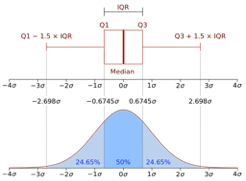

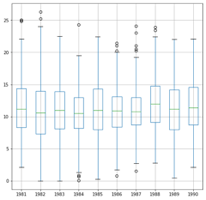

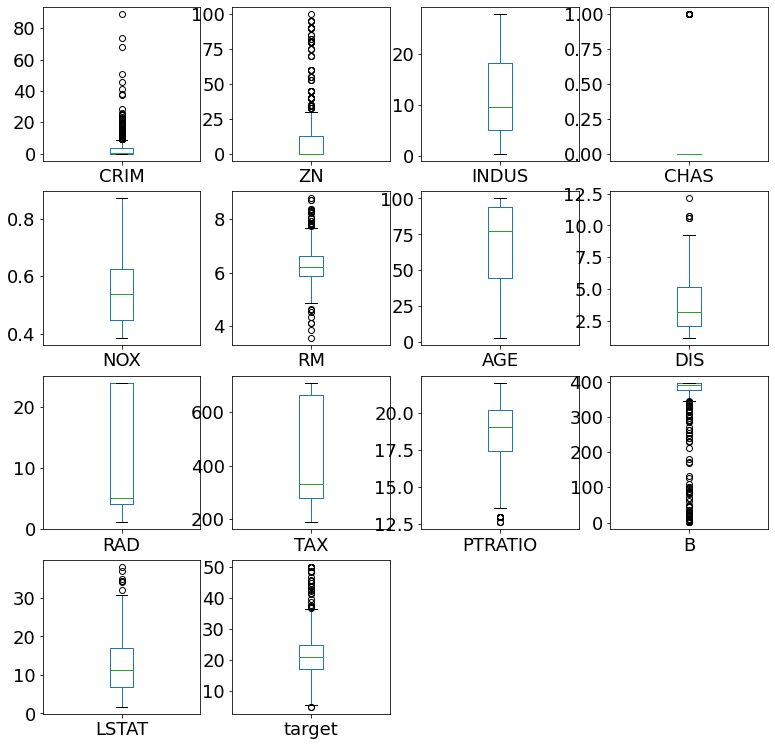

In [23]:
#rcParams['figure.figsize'] = 10, 10
#rcParams['font.size'] = 20
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=18)
pyplot.show()

# Scatter matrix
<hr style="border:2px solid black"> </hr>


- We can see that some of the higher correlated attributes do show good structure in their relationship. 
- Not linear, but nice predictable curved relationships.
    


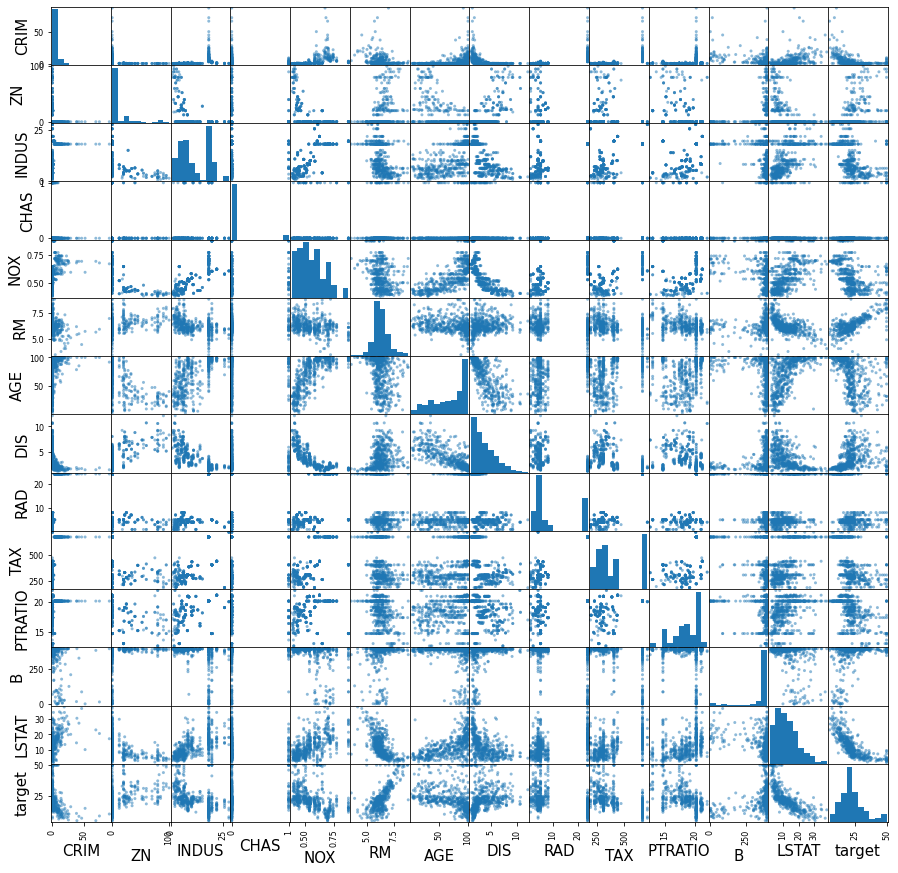

In [24]:
# scatter plot matrix
rcParams['figure.figsize'] = 15, 15
rcParams['font.size'] = 15
scatter_matrix(dataset)
pyplot.show()

# Plan of actions
<hr style="border:2px solid black"> </hr>


- Problem: **regression**
- From the data we can see that the following avenues can be tried:

    1. Feature selection and removing the most correlated attributes.
    - Normalizing the dataset to reduce the effect of differing **->SCALES<-.**
    - Standardizing the dataset to reduce the effects of differing **->DISTRIBUTIONS<-.**
    


# Splitting the data
<hr style="border:2px solid black"> </hr>

In [25]:
array = dataset.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, Y, test_size=validation_size, random_state=7)

print("Shape of validation set: ", X_validation.shape)
print("Shape of test set: ", X_train.shape)
print("Shape of original set: ", X.shape)

Shape of validation set:  (102, 13)
Shape of test set:  (404, 13)
Shape of original set:  (506, 13)


# Compare algorithms
<hr style="border:2px solid black"> </hr>


**Linear Algorithms**
- Linear Regression (LR)
- Lasso Regression (LASSO) -> Linear least sqaure with L1 regularisation
- Ridge Regression (RIDGE) -> Linear least sqaure with L2 regularisation
- ElasticNet (EN)

**Nonlinear Algorithms**
- Classification and Regression Trees (CART)
- Support Vector Regression (SVR) 
- k-Nearest Neighbors (KNN)
<br>

Please NOTE THAT using the **neg_mean_squared_error** scoring -> essetially the closest to zero the better



In [27]:
# List of models we'd like to evaluate
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')

    results.append(cv_results)
    names.append(name)
    print("Model: ", name, ", mean: ",
          cv_results.mean(), ", std: ", cv_results.std())

Model:  LR , mean:  -22.00600854198875 , std:  12.188886010681342
Model:  LASSO , mean:  -27.105803342288556 , std:  13.165914704600763
Model:  RIDGE , mean:  -22.040492855443688 , std:  12.550922726843824
Model:  EN , mean:  -27.923013623389988 , std:  13.156405425527128
Model:  KNN , mean:  -39.808935902439025 , std:  16.50796779686553
Model:  CART , mean:  -28.13656097560975 , std:  18.33996552873989
Model:  SVR , mean:  -67.82470522477362 , std:  32.80153025353701



- It looks like LR has the lowest MSE, followed closely by CART.
- An additional check would be to look at the distribution of scores across all cross validation folds by algorithm. 
- The DIFFERING SCALES of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN.



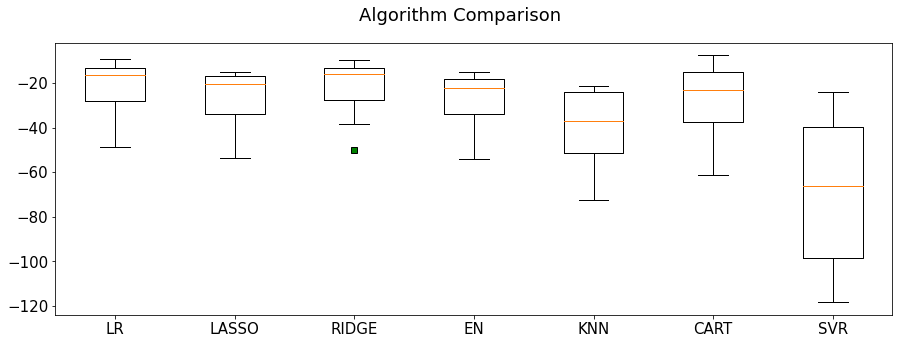

In [28]:
rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 15
fig = pyplot.figure()
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
pyplot.boxplot(results, notch=False, flierprops=dict(
    markerfacecolor='g', marker='s'))
ax.set_xticklabels(names)
#ax.grid(which = "major", linestyle='-', linewidth=' 0.5', color='k')
#ax.grid(which = "minor", linestyle='--', linewidth='0.5', color='k')
# ax.minorticks_on()
pyplot.show()

# Standardisation [fix different distributions]
<hr style="border:2px solid black"> </hr>


- We suspect that the differing scales of the raw data may be negatively impacting theskill of some of the algorithms. 
- Let’s evaluate the same algorithms with a  STANDARDIZED copy of the dataset. 
- This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1.
- We use pipeline to avoid data leakage.
- Running the example provides a list of mean squared errors. We can see that scaling DID have an effect on KNN, driving the error lower than the other models



In [29]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)    
    print("Model: ", name, ", mean: ", cv_results.mean(), ", std: ", cv_results.std())    

Model:  ScaledLR , mean:  -22.006008541988745 , std:  12.188886010681149
Model:  ScaledLASSO , mean:  -27.205895658130324 , std:  12.124418229519787
Model:  ScaledRIDGE , mean:  -21.988408595885403 , std:  12.189610389336645
Model:  ScaledEN , mean:  -28.30115970360337 , std:  13.609109541638533
Model:  ScaledKNN , mean:  -21.45686665853659 , std:  15.016217766474995
Model:  ScaledCART , mean:  -27.12362987804878 , std:  18.98367202421088
Model:  ScaledSVR , mean:  -29.57043293858262 , std:  18.05296397264449



- We can see that the standardisation has improved the error for both SVR & KNN.
- We can see that KNN has both a tight distribution of error and has the lowest score.



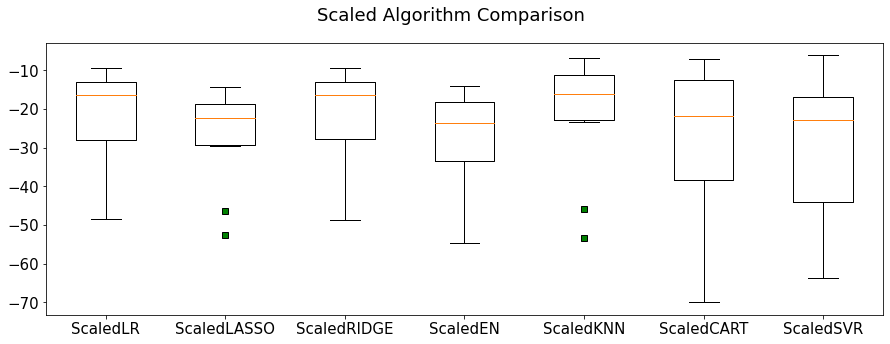

In [30]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison') 
rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 15
ax = fig.add_subplot(111) 
pyplot.boxplot(results, notch = False, flierprops=dict(markerfacecolor='g', marker='s')) 
ax.set_xticklabels(names)
pyplot.show()

# Tuning of the hyperparameters
<hr style="border:2px solid black"> </hr>


We know from the results in the previous section that KNN achieves the best results on a scaled version of the 
dataset. But can it do better. But can we do better? we can try to tune the hyperparameter by:

1. grid search
- boosting methods: AdaBoost (AB) and Gradient Boosting (GBM)
- bagging methods: Random Forests (RF) and Extra Trees (ET)


The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of different
numbers of neighbors and see if we can improve the score. The below example tries odd k values from 1 to 21, 
an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross
validation on a standardized copy of the training dataset.




# KNN Algorithm tuning via grid search
<hr style="border:2px solid black"> </hr>

In [32]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])

param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)

grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print("\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}

Best: -19.497829 using {'n_neighbors': 1}


# Tuning via BOOSTING & BAGGING
<hr style="border:2px solid black"> </hr>

In [33]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline(
    [('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline(
    [('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline(
    [('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline(
    [('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.651674 (7.814919)
ScaledGBM: -10.909886 (8.592436)
ScaledRF: -12.955220 (9.943086)
ScaledET: -9.414916 (7.067550)


# Compare Algorithms
<hr style="border:2px solid black"> </hr>


-  Boosting and bagging has reach a far better accuracy, there fore will compare thme only.
- We can probably do better, given that the ensemble techniques used the default parameters.
- In the next section we will look at tuning the Gradient Boosting to further lift the performance.



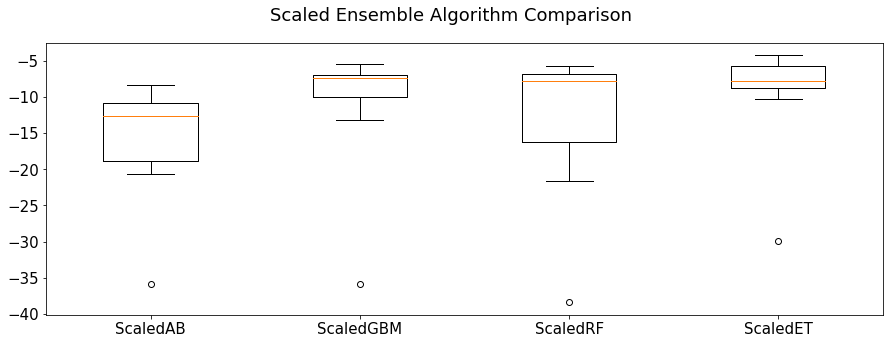

In [34]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show() 

# Tune ensemble methods
<hr style="border:2px solid black"> </hr>


- Based on the plot above we decide to further tune GradientBoostingRegressor.
- It is not the best in absolute value but still one the top ones.
- **n_estimator** is set to 100 by default. Can we test more of these values? Yes, we can and this is exactly what we are going to do now.



In [35]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))

model = GradientBoostingRegressor(random_state = 7)
kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring = 'neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.560638 using {'n_estimators': 400}
-11.629999 (8.833221) with: {'n_estimators': 50}
-11.073455 (8.772155) with: {'n_estimators': 100}
-10.838924 (8.734377) with: {'n_estimators': 150}
-10.785568 (8.657244) with: {'n_estimators': 200}
-10.654778 (8.540552) with: {'n_estimators': 250}
-10.649385 (8.497232) with: {'n_estimators': 300}
-10.589337 (8.413596) with: {'n_estimators': 350}
-10.560638 (8.353747) with: {'n_estimators': 400}


# Finalise the model
<hr style="border:2px solid black"> </hr>


- So far we have:
    1. Look at the data and comment on their distribution
    - Quickly search through some methods
    - Pick the most promising method and further tune it
<br>
- Now it is the time to put to use this best method.
- We can see that the error is very close the one we predict while working on the tuning. 
- It does not have to be the  same as we are working on unseen data.



In [37]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state = 7, n_estimators=400)
model.fit(rescaledX, Y_train)


# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print(mean_squared_error(Y_validation, predictions))

11.902132586880027


# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

